#### Linear value regressor (Linear regression)

In [7]:
### Data import using the pandas library
import pandas as pds
uncleaned_dataX = pds.read_csv('Linear_X_Train.csv')
uncleaned_dataY = pds.read_csv('Linear_Y_Train.csv')
print(type(uncleaned_dataX))
print(type(uncleaned_dataY))

print("\n\n")

print("Extraction of data from the data  values")
uncleaned_dataX = uncleaned_dataX.values
uncleaned_dataY = uncleaned_dataY.values
print(type(uncleaned_dataX))
print(type(uncleaned_dataY))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>



Extraction of data from the data  values
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
### Statistical data analysis
print("Mean {}".format(uncleaned_dataX.mean()))
print("Std {}".format(uncleaned_dataX.std()))

### Normalizing the data

## Clearly in this case we don't need any standardisation as mean is approx 0 and std is 1
X = uncleaned_dataX
Y = uncleaned_dataY

Mean -0.03779466168006855
Std 0.9920801322508517


No handles with labels found to put in legend.


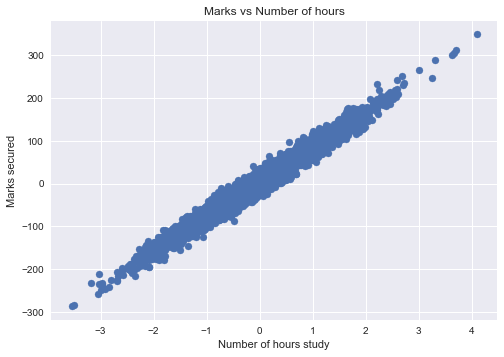

In [27]:
### Exploratory data analysis
import matplotlib.pyplot as plt

# print(plt.style.available)
plt.style.use("seaborn") ## Can be choosen any from the list 
plt.scatter(X[:,0],Y[:,0])
plt.xlabel("Number of hours study")
plt.ylabel("Marks secured")
plt.legend()
plt.title("Marks vs Number of hours")
plt.show()

In [56]:
### Model for prediction
### Clearly we can fit the straight line through it and have the regressor with good predictibility

## We would create the class so the make it easy transform to the module
## Same method used in the sklearn

import numpy as np

class LinearRegression:
    def __init__(self,X,Y):
        """Initialize the x and y variable here"""
        self.X = X
        self.Y = Y
        
    def hypothesis(self,theta,x):
        """Method return the prediction"""
        pred = theta[0] + theta[1]*x ## Y = mx + c
        return pred
    
    def errorFn(self,theta):
        """Method returns the error"""
        ### To prevent from overflow we would divide it by the common term
        error = 0.0
        
        X = self.X
        Y = self.Y
        
        for i in range(X.shape[0]):
            ### The error is mean squared 
            error += (self.hypothesis(theta,X[i]) - Y[i])**2
        return error/X.shape[0]
    
    def gradientDescent(self,theta,learning_rate):
        """Function implements the gradient descent equation"""
        X = self.X
        Y = self.Y
        
        grad = np.zeros((2,))
        for i in range(X.shape[0]):
            grad[0] += (self.hypothesis(theta,X[i]) - Y[i])
            grad[1] += (self.hypothesis(theta,X[i]) - Y[i])*X[i]
        
        grad = grad/X.shape[0]
        
        # 2*1 = 2*1 - (1)*2*1
        theta = theta - learning_rate*grad
        return theta
    
    def fit(self,learning_rate=0.1):
        """Function train the model"""
        theta = np.zeros((2,))
        
        currItr = 0
        itr = 100
        
        errorList = []
        while currItr<=itr:
            errorList.append(self.errorFn(theta))
            theta = self.gradientDescent(theta,learning_rate)
            currItr += 1
            
        return theta,errorList
    
    def verifyModelByError(self,errorList):
        """Help in checking if error is reducing"""
        plt.plot(errorList)
        plt.title("Error plot")
        plt.xlabel("Iteration number")
        plt.ylabel("Error")
        plt.show()
    
    def visulizeBoundary(self,theta):
        theta0 = theta[0]
        theta1 = theta[1]
        xTemp = np.linspace(-3,4)
        yTemp = theta0 + xTemp*theta1

        plt.scatter(X[:,0],Y[:,0],label="Data provided")
        plt.plot(xTemp,yTemp,label="Prediction line",c = "orange")
        plt.xlabel("Number of hours study")
        plt.ylabel("Marks secured")
        plt.legend()
        plt.title("Marks vs Number of hours")
        plt.show()
        return

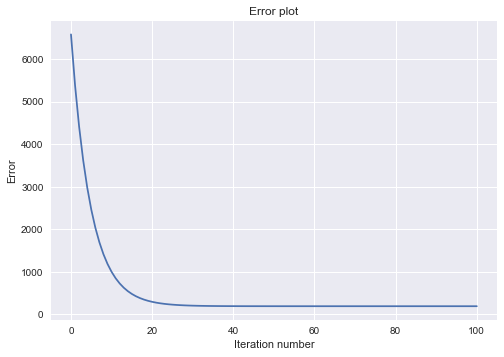

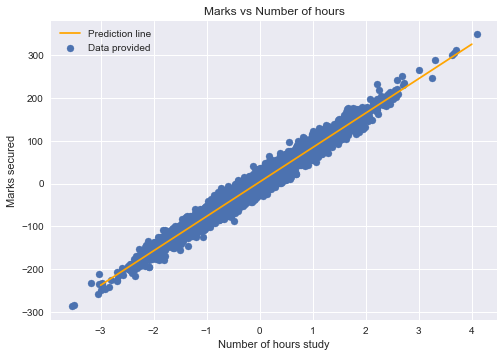

In [57]:
lr = LinearRegression(X,Y)
theta,errorList = lr.fit()
lr.verifyModelByError(errorList)
lr.visulizeBoundary(theta)